# Section 6: Data Cleaning

## Missing Data
- things like a 0, empty cell, or a string for a price value are considered missing data
- like python falsy values

In [1]:
import numpy as np
import pandas as pd

In [30]:
#anything that is not in this list is a Truthy value
falsy_values = (0, False, None, '', [], {})

In [3]:
any(falsy_values)

False

In [5]:
#not a number
np.nan

nan

In [7]:
#anything you do with np.nan becomes np.nan
a = np.array([1,2,3,np.nan,np.nan,4])

In [8]:
a.sum()

nan

In [9]:
a.mean()

nan

In [12]:
#numpy's infinite type, behaves like a virus, just like nan
np.inf

inf

#### checking for nan or inf

In [14]:
#same thing for inf
np.isnan(np.nan)

True

In [15]:
#or checking for both
np.isfinite(np.nan), np.isfinite(np.inf)

(False, False)

These can take arrays as inputs and return boolean arrays

#### filtering them out

In [16]:
a = np.array([1,2,3,np.nan,np.nan,4])

In [20]:
#creates new array with only non nan and non inf elements
a[np.isfinite(a)]

array([1., 2., 3., 4.])

In [21]:
#now can perform normal operations on it
a[np.isfinite(a)].sum()

10.0

## Handling Missing Data with Pandas

In [22]:
import numpy as np
import pandas as pd

### Functions to detect null values

In [24]:
pd.isnull(np.nan), pd.isnull(None)

(True, True)

In [27]:
#is a synonym of the above
pd.isna(np.nan)

True

In [28]:
#opposite one
pd.notnull(np.nan), pd.notna(None)

(False, False)

In [29]:
pd.notnull(3)

True

In [31]:
#can also pass it series and dataframes
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [33]:
#they return series and dataframes correspondingly
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


### Pandas Operations with Missing Values
- unlike numpy, pandas can do operations with missing values by just ignoring them

In [34]:
pd.Series([1,2,np.nan]).count()

2

In [35]:
pd.Series([1,2,np.nan]).mean()

1.5

### Filtering missing data

In [36]:
s = pd.Series([1,2,3,np.nan,np.nan,4])

In [37]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [38]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

### Dropping null values

#### On series

In [39]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [42]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

#### On DataFrames
- a little bit harder because can't drop single values, can only drop columns and rows

In [43]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [45]:
df.shape

(4, 4)

In [46]:
#know we have 4 rows, so if only have 3 non-null, 1 value is null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [47]:
#default drops rows with at least one null value
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [48]:
#can also drop columns instead
df.dropna(axis=1)

,Column D
0,5
1,8
2,34
3,110


In [50]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [51]:
#only drops row if all values are null
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [52]:
df.dropna(how='any')  # default behavior

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [53]:
#if at least 3 values are non-null, the row is kept
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


### Filling null values
- sometimes can be replaced by a 0 or the mean value for that column, etc

In [54]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [56]:
#fill with arbitrary value
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [57]:
#fill with mean
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [58]:
#filling with close value from above
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [59]:
#fill with close value from below
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

the bad thing about using close values is that cell might be left blank if it is at extreme

### Filling null values on DataFrames
- similar but specify axis (row or column) to use to fill the values

In [60]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [62]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [64]:
#close values by column
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [65]:
#close values by rows
df.fillna(method='ffill', axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


### Checking if there are NAs

#### Checking the length
- if there are missing values, s.dropna() will have less elements than s

In [70]:
len(s), len(s.dropna())

(6, 4)

In [68]:
missing_values = len(s.dropna()) != len(s)
missing_values

True

#### More Pythony solution 'any'

In [72]:
#are any of the values True
pd.Series([True,False,False]).any()

True

In [73]:
#are all the values True
pd.Series([True,False,False]).all()

False

In [76]:
#this tells us at least one value in s is a null value
s.isnull().any()

True

## Cleaning not-null values
- if values are not null values, but are invalid for some reason

In [77]:
import numpy as np
import pandas as pd

In [79]:
#have invalid 290 for age and D and ? for sex
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [80]:
#first get all values of specific column
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [81]:
#replace invalid values ('to be replaced', 'replace with')
df['Sex'].replace('D', 'F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [82]:
#can have a dictionary to replace all invalids at once
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [83]:
#if wanted to replace values in many columns, could use dataframe type
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In [85]:
#if saw that some ages had an extra 0 at the end
df.loc[df['Age']>100, 'Age'] = df.loc[df['Age']>100, 'Age']/10
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


### Duplicates in Series

In [86]:
#can only invite one ambassador per country
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

In [87]:
#tells you which values are duplicated
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [88]:
#default it keeps the first appearance as the non duplicate, can change it though
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In [89]:
#or mark all of them as duplicates
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [92]:
#to drop the duplicates, keep parameters work the same way
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

### Duplicates in DataFrames
- happen at row level. 2 rows with same values are duplicates.

In [93]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [94]:
#default = all column values need to be the same
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [95]:
#choose which columns to look at to find duplicates
players.duplicated(subset=['Name'], keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

the drop_duplicates works the same way and takes the same parameters

### Text Handling
- most complex type, these are some of the most common cases:

#### Splitting Columns
- when data comes as one single value, but actually have multiple pieces of info in it

In [96]:
#should have columns for year, sex, coutry, number of children
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [102]:
#split method splits acording to (1st argument), _ in this case
df['Data'].str.split('_', expand=True)

KeyError: 'Data'

In [101]:
df

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [104]:
df.columns = ['Year','Sex','Country','# Children']
df

,Year,Sex,Country,# Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [105]:
#checking if a string contains a certain thing
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [106]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [109]:
#removing spaces in country names
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

## More Visualizations

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Global API
- most codes use this API, some people prefer OOP (object translated API)

In [111]:
x = np.arange(-10, 11)

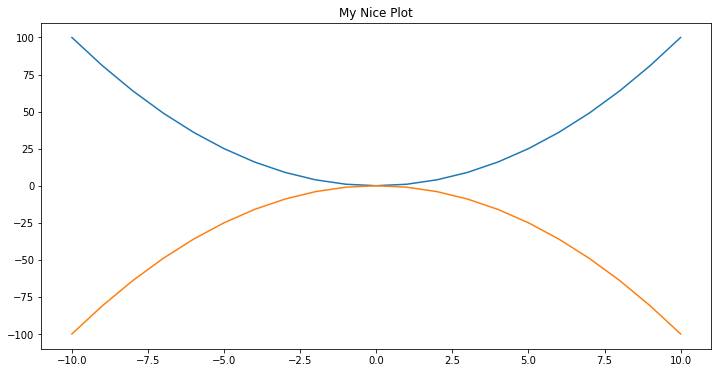

In [112]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X Squared')

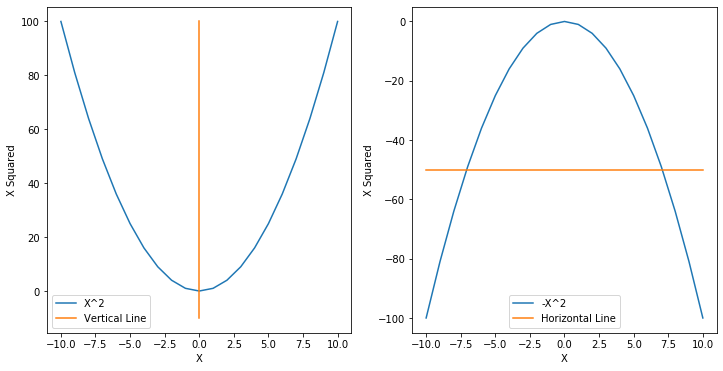

In [113]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

this more complicated plot shows the issues with this Global API. You can't know exactly which line of code creates which line or text in which plot. It depends only on the order that the code is executed. If you had 100 lines for first subplot, would be hard to keep track of where plot 2 starts.

### OOP Interface
- creates figure and axes and keep references to them
- will be way more explicit, easier to keep track of


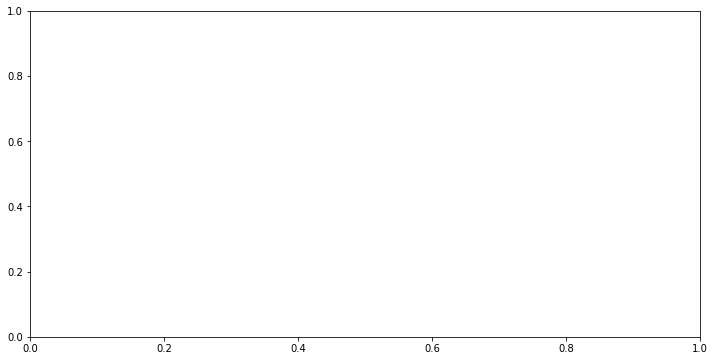

In [116]:
#creating figure and axes
fig, axes = plt.subplots(figsize=(12, 6))

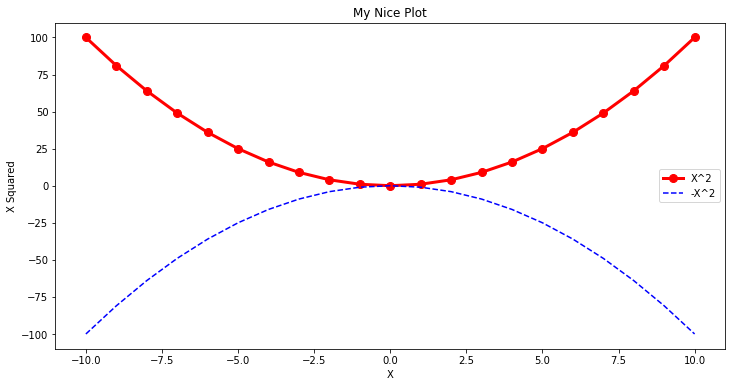

In [117]:
#in this case have only one axes, can plot multiple things to it
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

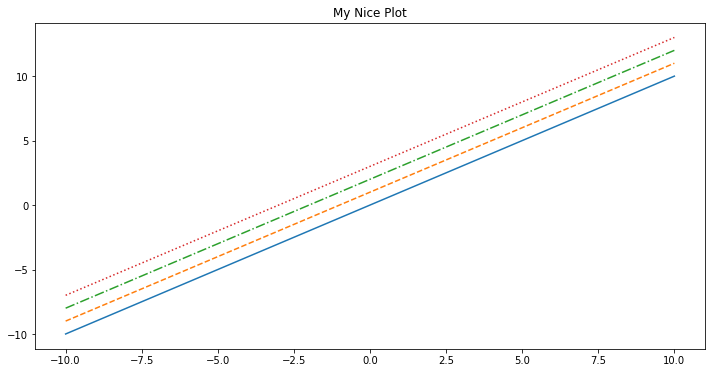

In [118]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

#### Other types of plots

- figures and subfigures

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x124b92dd0>)

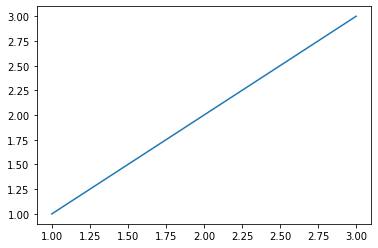

In [122]:
#only one main figure
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

(<Figure size 1008x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124c040d0>,
       dtype=object))

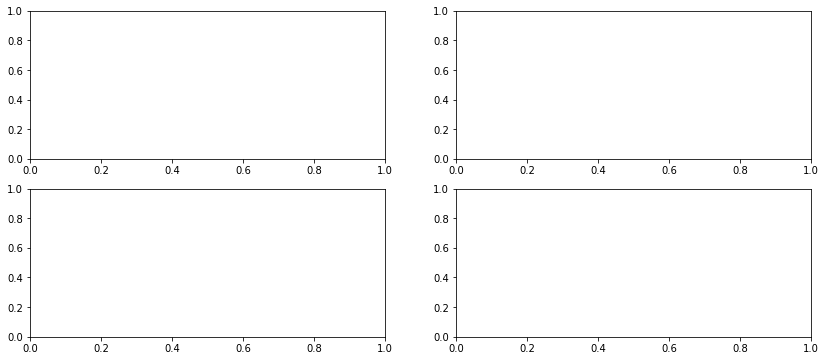

In [123]:
#multiple subplots
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

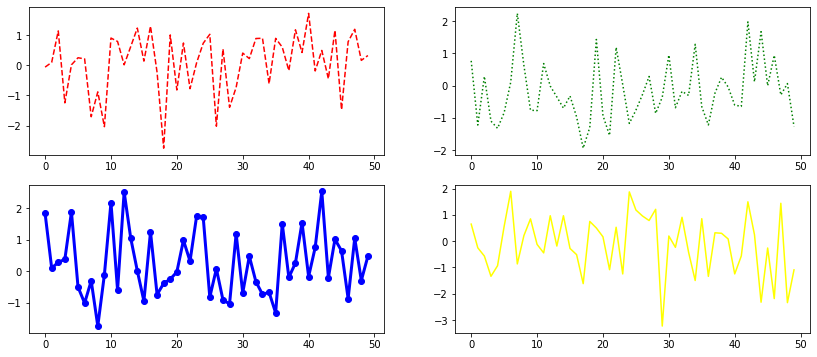

In [124]:
#can plot things in each subplot by referencing its axes, order doesn't matter.
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)

fig

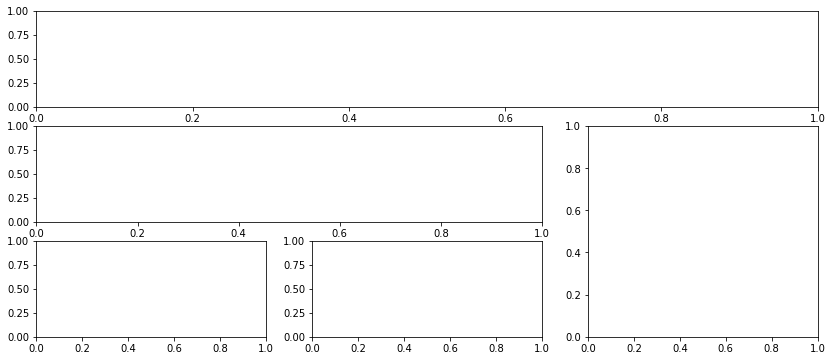

In [125]:
#more advanced subplots
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

- scatter plot

In [126]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii

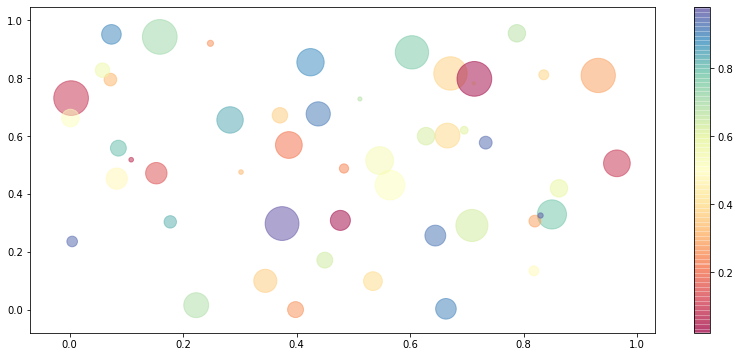

In [127]:
#are plotting 4 different pieces of info
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

 - histograms

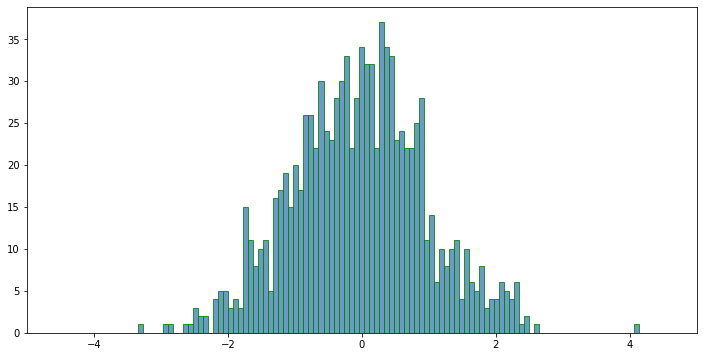

In [128]:
values = np.random.randn(1000)

plt.subplots(figsize=(12, 6))
plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)
plt.show()

- KDE (density plot)

In [131]:
from scipy import stats

In [132]:
density = stats.kde.gaussian_kde(values)
density

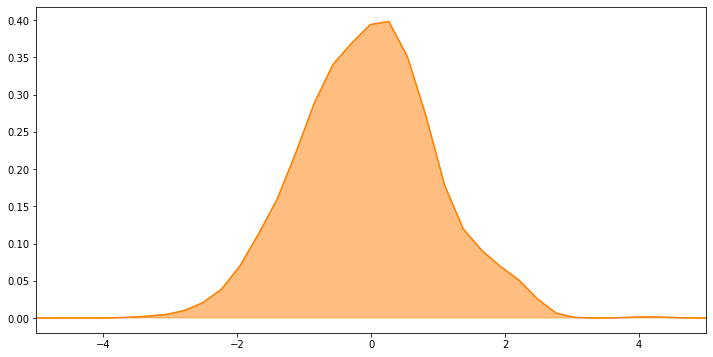

In [133]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

- combine plots

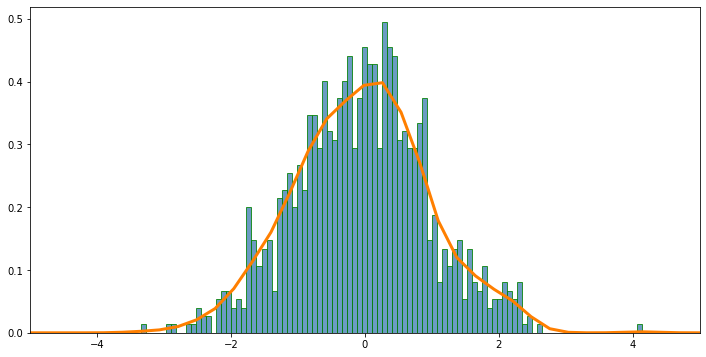

In [134]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

- bar plots

In [135]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

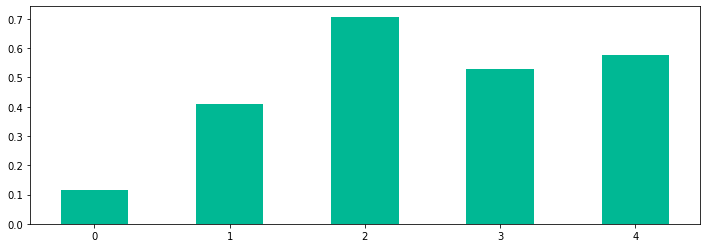

In [137]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

## Real Example

In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
#importing data, changing data type to dates and making column 1 our index
df = pd.read_csv(
    '/Users/rebeccaceppas/code/data-analysis-course/btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

In [143]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


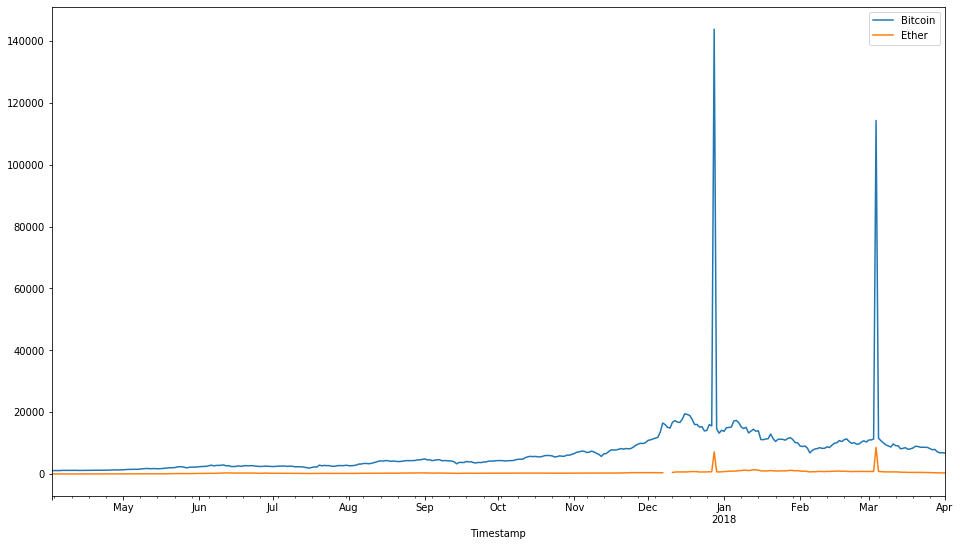

In [145]:
#quick plot to see there are some invalid spikes and data missing for ether
df.plot(figsize=(16,9))

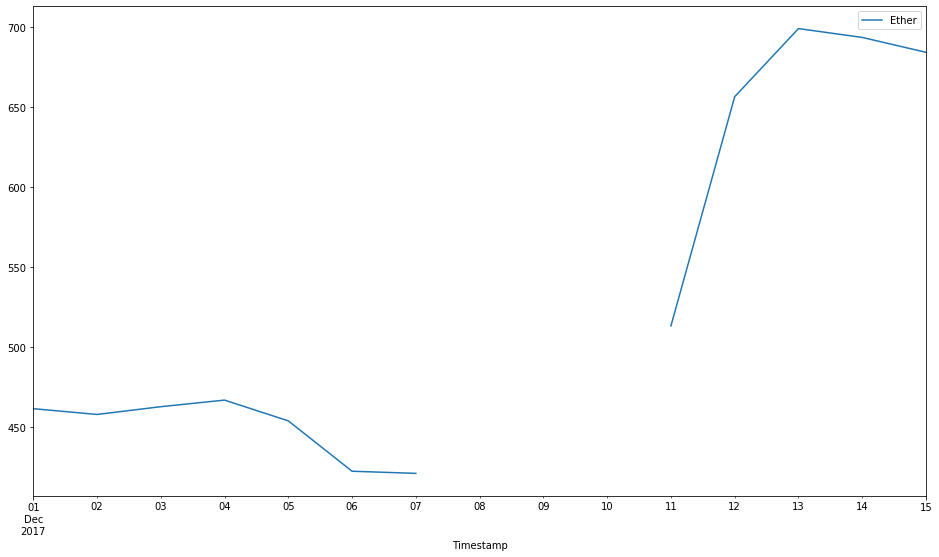

In [147]:
#zooming into issue for ether
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

In [148]:
#want to check if there are null values here
df_na = df.loc['2017-12': '2017-12-15']
df_na['Ether'].isna().values.any()

True

In [149]:
#finding when exactly are the null values found
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [150]:
#looking at the context around it
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [152]:
#assuming little flunctuations at those times, can fill in
df.fillna(method='bfill', inplace=True)

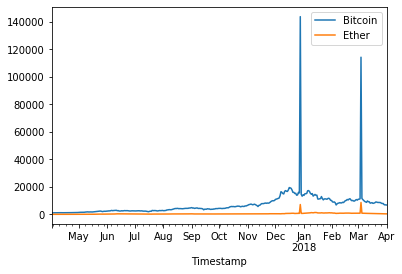

In [154]:
#fixed hole
df.plot()

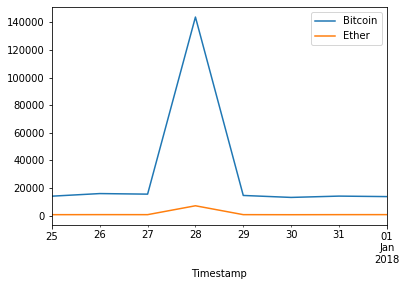

In [155]:
#zooming into first spike
df['2017-12-25':'2018-01-01'].plot()

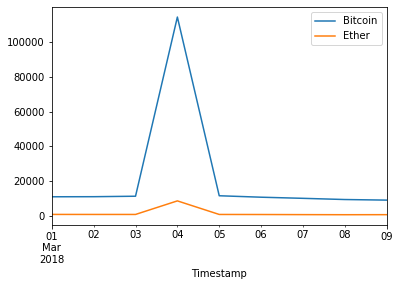

In [156]:
#and second spike
df['2018-03-01': '2018-03-09'].plot()

In [157]:
#from plots know which day they are locates, so now drop data from those 2 days
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))

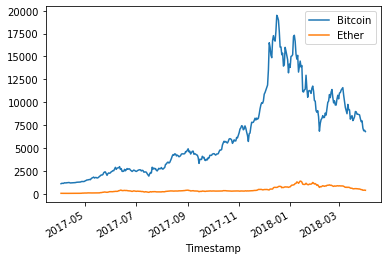

In [158]:
df_cleaned.plot()

### Cleaning Analysis

we have visually cleaned out data, we need to use analytical methods to identify outliers now.

#### Central Tendency

In [159]:
#with invalid values
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [160]:
#clean, not being affected by outliers
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

In [161]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

#### Visualizing Distribution

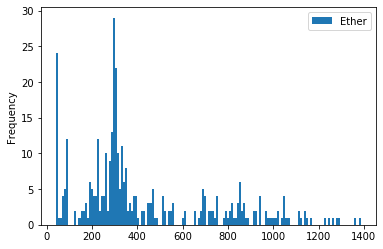

In [162]:
df_cleaned.plot(kind='hist', y='Ether', bins=150)

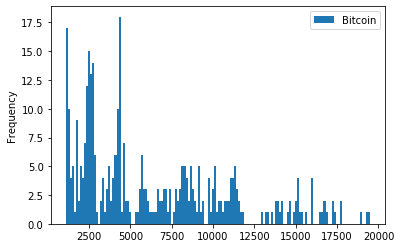

In [163]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150)

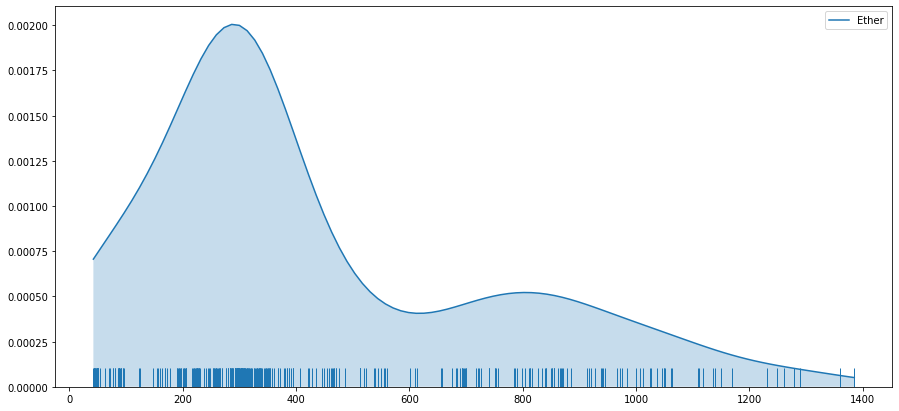

In [168]:
#using seaborn
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Ether'], ax=ax);

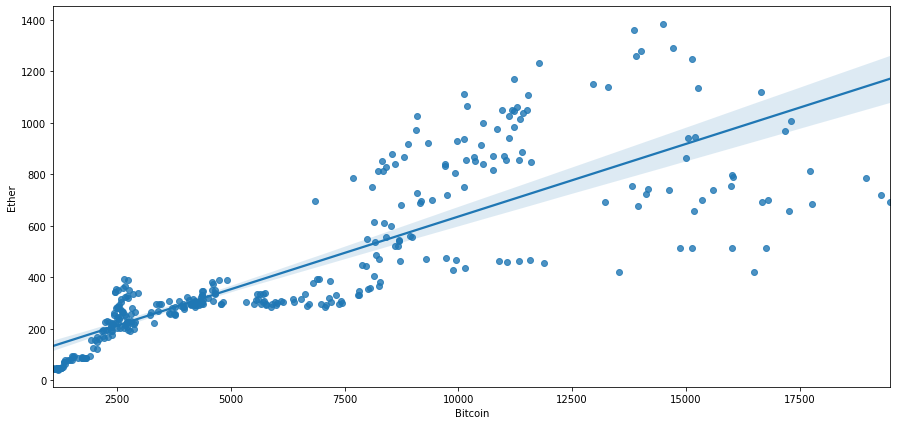

In [169]:
#scatter plot with linear regression model fitted
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="Bitcoin", y="Ether", data=df_cleaned, ax=ax)

#### Dispersion

In [171]:
#range
df['Bitcoin'].max() - df['Bitcoin'].min()

142706.6475416667

In [172]:
#range is very sensitive to outliers
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

18399.514208333334

In [173]:
#variance
df['Bitcoin'].var()

103766537.75278121

In [174]:
#both variance and standard deviation sensible to outliers
df_cleaned['Bitcoin'].std()

4513.757662530282

#### IQR (interquartile range)
- good measure of centered dispersion (Q3 - Q1)

In [175]:
df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)

6597.494147619047

In [177]:
#can see it's not so sensible to outliers
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(.25)


6548.249242559523

#### Analytical Analysis of invalid values

- using standard deviation, Z scores

In [178]:
#upper/lowe limits given by twice the standard deviation away from mean
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()

In [179]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.17635730169
Lower Limit: -13377.16831365621


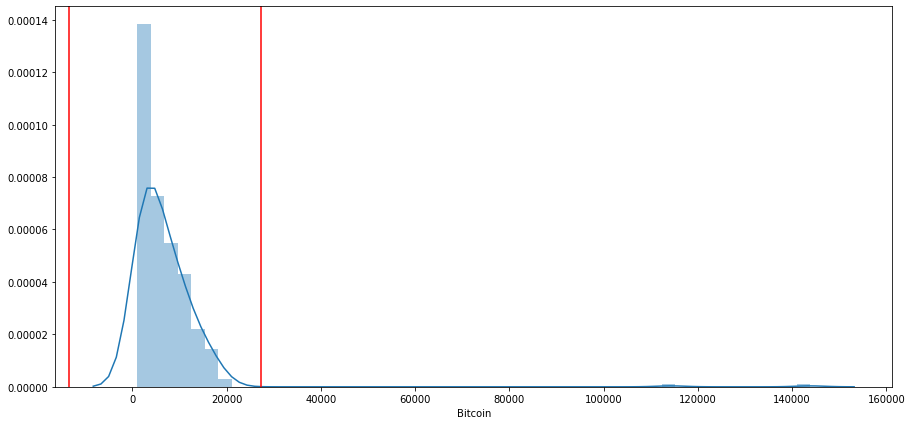

In [181]:
#anything past these lines could be considered an invalid value
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

- using IQRs

In [182]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [185]:
#limits given by twice the iqr range away from mean
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr

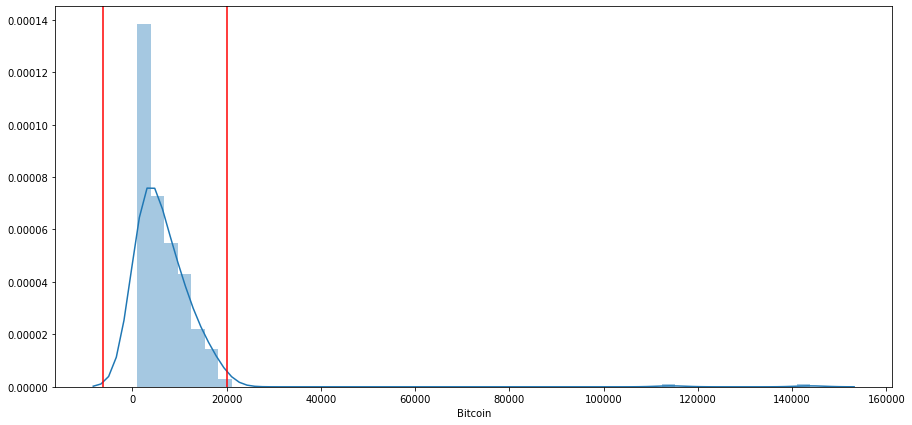

In [186]:
#still good indicator, but few valid values seem to be invalid
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

#### Cleaning invalid values analytically

In [187]:
#defining upper limit
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()


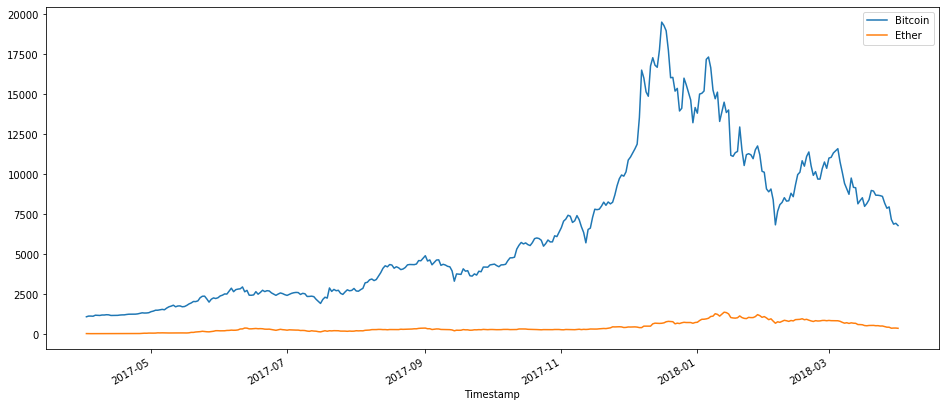

In [188]:
#graph of everything within the limit
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))
